# Merge Files

In [17]:
years=[]
start=input("Enter start year: ")
end=input("Enter end year: ")
start = int(start)  
end = int(end)
for i in range(start,end+1):
    years.append(str(i))

Enter start year:  1991
Enter end year:  2006


In [18]:
import os


# Set the directory path and the list of prefixes to search for
directory = "/Users/shaistasyeda/Desktop/DataSet/TextFiles"
# prefixes = ["prefix1_", "prefix2_", "prefix3_"]

# Create a new file to store the merged contents
with open("merged_file_1991_2006.txt", "w") as f:
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        # Check if the filename starts with any of the prefixes
        if any(filename.startswith(prefix) for prefix in years):
            # Open the file and read the contents
            with open(os.path.join(directory, filename), "r") as file:
                contents = file.read()
                # Write the contents to the merged file
                f.write(contents)

## Tokenization of the Merged files

In [10]:
input_directory_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates'

In [6]:
import os
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [7]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shaistasyeda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shaistasyeda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Basic Statistics

In [23]:
# Initialize counters
total_word_count = 0
total_sentence_count = 0
document_count = 0

# Loop through the tokenized files
for file_name in os.listdir(input_directory_path):
    if file_name.endswith('_tokenized.txt'):
        with open(os.path.join(input_directory_path, file_name), 'r', encoding='utf-8') as file:
            sentences = file.readlines()
            document_count += 1
            total_sentence_count += len(sentences)
            for sentence in sentences:
                words = word_tokenize(sentence)
                total_word_count += len(words)

# Calculate average word and sentence counts per document
avg_word_count_per_doc = total_word_count / document_count
avg_sentence_count_per_doc = total_sentence_count / document_count

print(f"Total Documents: {document_count}")
print(f"Total Sentences: {total_sentence_count}")
print(f"Total Words: {total_word_count}")
print(f"Average Word Count per Document: {avg_word_count_per_doc:.2f}")
print(f"Average Sentence Count per Document: {avg_sentence_count_per_doc:.2f}")

Total Documents: 5
Total Sentences: 4360934
Total Words: 302575584
Average Word Count per Document: 60515116.80
Average Sentence Count per Document: 872186.80


In [25]:
# Initialize a dictionary to store word counts for each time period
word_count_per_period = {}

# Function to count words in a list of sentences
def count_words(sentences):
    word_count = 0
    for sentence in sentences:
        word_count += len(sentence)
    return word_count

# Loop through the tokenized files
for file_name in os.listdir(input_directory_path):
    if file_name.endswith('_tokenized.txt'):
        with open(os.path.join(input_directory_path, file_name), 'r', encoding='utf-8') as file:
            sentences = [line.strip().split() for line in file.readlines()]
            word_count = count_words(sentences)
            time_period = file_name.replace('_tokenized.txt', '')
            word_count_per_period[time_period] = word_count

# Print word counts for each time period
for time_period, word_count in word_count_per_period.items():
    print(f'Time Period: {time_period}, Word Count: {word_count}')



Time Period: 1800_1849, Word Count: 29697414
Time Period: 1850_1920, Word Count: 71324065
Time Period: 1921_1970, Word Count: 79527122
Time Period: 1971_1990, Word Count: 72586314
Time Period: 1991_2006, Word Count: 49440669


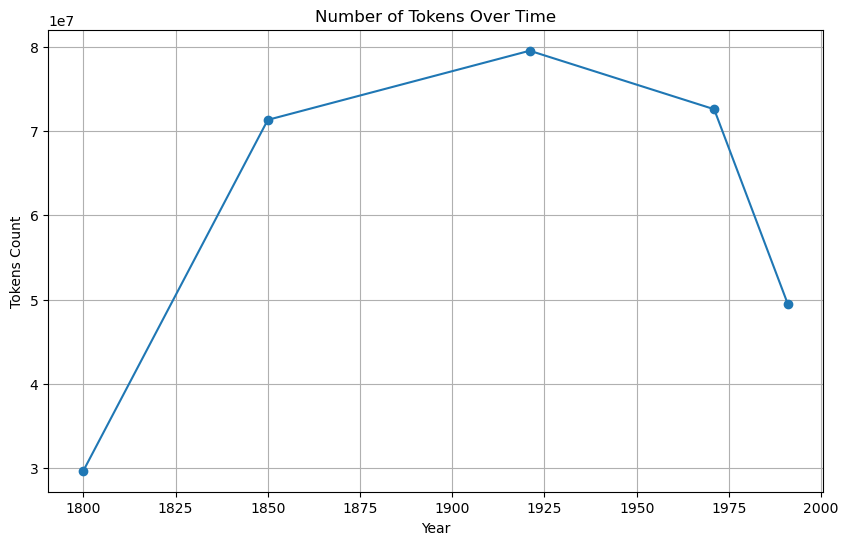

In [1]:
import matplotlib.pyplot as plt

years = [1800, 1850, 1921, 1971, 1991]
tokens_counts = [29697414, 71324065, 79527122, 72586314, 49440669] 

plt.figure(figsize=(10, 6))
plt.plot(years, tokens_counts, marker='o', linestyle='-')
plt.title('Number of Tokens Over Time')
plt.xlabel('Year')
plt.ylabel('Tokens Count')
plt.grid(True)
plt.show()

# Keyword Analysis - Identify the occurance of few words 

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy pillow matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages.


In [5]:
conda install -c https://conda.anaconda.org/conda-forge wordcloud

Retrieving notices: ...working... DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/notices.json HTTP/1.1" 404 None
done
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
/ DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Start

In [6]:
import nltk
from nltk import FreqDist
import os

# Directory path where tokenized files are stored
tokenized_files_directory = '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates/new-tokenized-debates'

# Initialize a dictionary to store word frequencies for each file
word_freq_per_file = {}

# Iterate through the tokenized files in the directory
for filename in os.listdir(tokenized_files_directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(tokenized_files_directory, filename)
        
        # Read the tokenized data from the file
        with open(file_path, 'r', encoding='utf-8') as file:
            tokenized_data = [line.strip().split() for line in file]

        # Initialize a FreqDist for the current file
        word_freq = FreqDist()
        
        # Calculate word frequencies for the current file
        flattened_tokens = [token for doc_tokens in tokenized_data for token in doc_tokens]
        word_freq.update(flattened_tokens)
        
        # Store the word frequencies for the current file
        word_freq_per_file[filename] = word_freq

# Get the most common words for each file
for filename, word_freq in word_freq_per_file.items():
    most_common_words = word_freq.most_common(10) 
    print(f"Most common words in {filename}: {most_common_words}")


Most common words in 1800_1849_tokenized.txt: [('house', 314395), ('hon', 311131), ('upon', 211379), ('country', 182988), ('member', 176813), ('lord', 176609), ('noble', 171510), ('one', 170036), ('right', 166580), ('bill', 162451)]
Most common words in 1850_1920_tokenized.txt: [('hon', 815977), ('house', 603366), ('member', 536150), ('government', 527779), ('bill', 514867), ('one', 428799), ('right', 423545), ('question', 389653), ('gentleman', 381741), ('upon', 378861)]
Most common words in 1921_1970_tokenized.txt: [('hon', 983886), ('member', 598059), ('government', 530103), ('one', 477566), ('right', 458778), ('house', 424021), ('minister', 413239), ('year', 385355), ('friend', 374268), ('made', 350911)]
Most common words in 1971_1990_tokenized.txt: [('hon', 709024), ('state', 665457), ('secretary', 581156), ('government', 499876), ('member', 450904), ('year', 409888), ('friend', 377851), ('lord', 361964), ('right', 337498), ('service', 327333)]
Most common words in 1991_2006_token

In [7]:
import nltk
from nltk import FreqDist
import os

# Directory path where your tokenized .txt files are stored
tokenized_files_directory = 'tokenized_debates/new-tokenized-debates'

# Initialize a FreqDist to store word frequencies
word_freq = FreqDist()

# Iterate through the tokenized .txt files in the directory
for filename in os.listdir(tokenized_files_directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(tokenized_files_directory, filename)
        
        # Read the tokenized data from the file
        with open(file_path, 'r', encoding='utf-8') as file:
            tokenized_data = [line.strip().split() for line in file]

        # Flatten the list of tokens and update word frequencies
        flattened_tokens = [token for doc_tokens in tokenized_data for token in doc_tokens]
        word_freq.update(flattened_tokens)

# Get the most common words and their frequencies
most_common_words = word_freq.most_common(10)  
print(most_common_words)


[('hon', 3154640), ('government', 2064272), ('member', 2006423), ('house', 1744488), ('state', 1703252), ('right', 1580867), ('one', 1549604), ('year', 1511136), ('lord', 1378510), ('secretary', 1376991)]


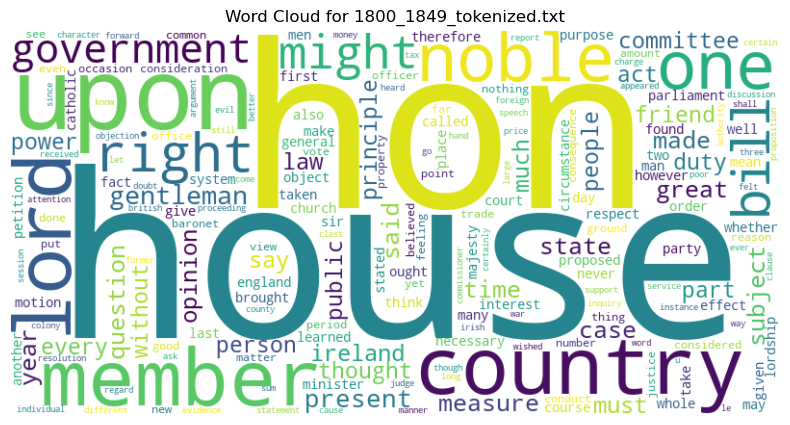

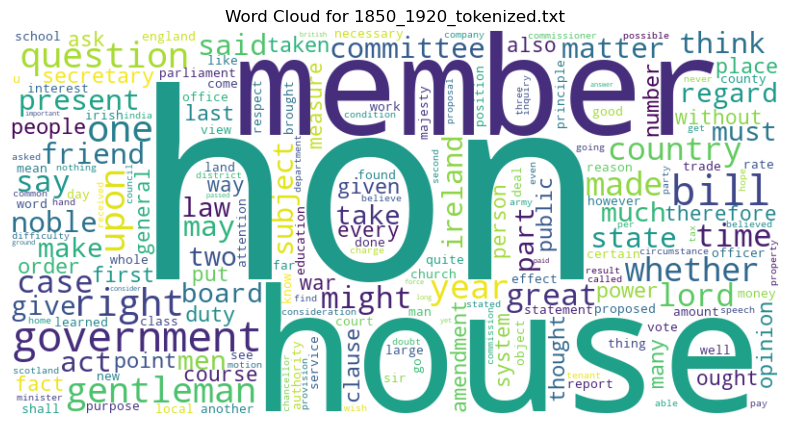

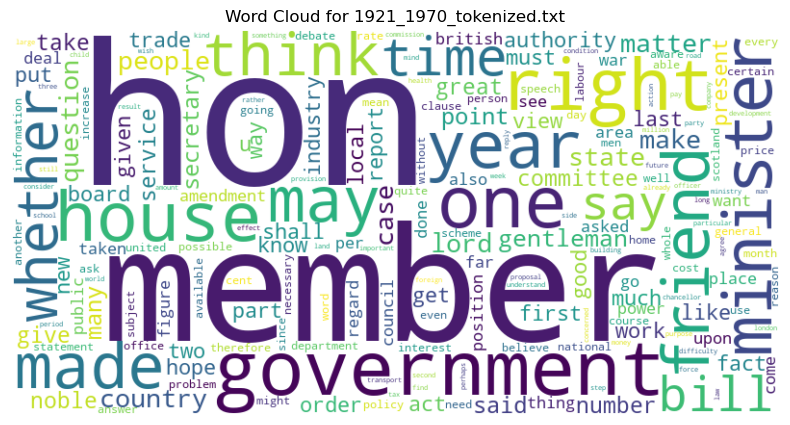

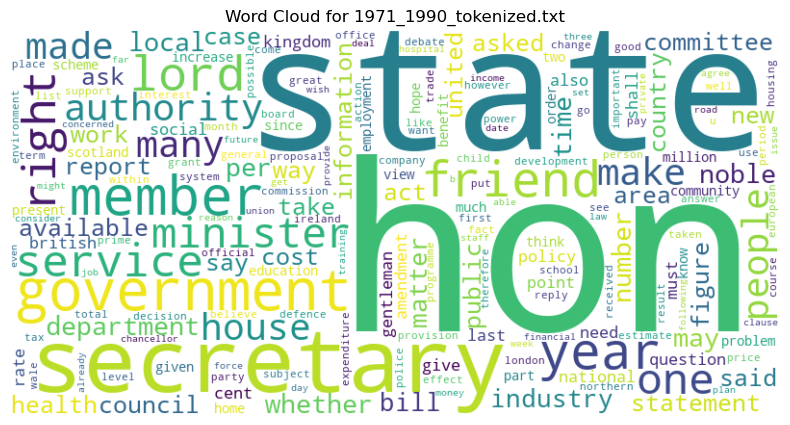

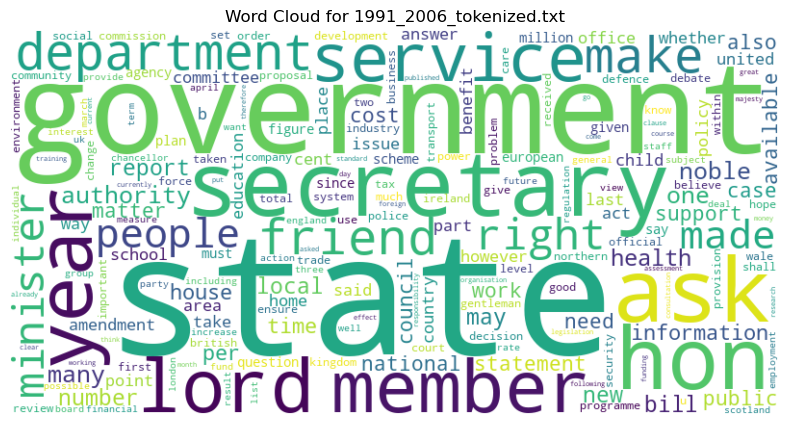

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Iterate through word frequencies for each file
for filename, word_freq in word_freq_per_file.items():
    # Extract the keywords and their frequencies
    most_common_words = word_freq.most_common(10)  
    keywords, frequencies = zip(*most_common_words)

    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Display the word cloud with the filename as the title
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {filename}")
    plt.axis('off')
    plt.show()


Keyword: woman
Time Period: 1800_1849, Count: 4097
Time Period: 1850_1920, Count: 28566
Time Period: 1921_1970, Count: 47130
Time Period: 1971_1990, Count: 38996
Time Period: 1991_2006, Count: 26686


Keyword: gender
Time Period: 1800_1849, Count: 545
Time Period: 1850_1920, Count: 572
Time Period: 1921_1970, Count: 557
Time Period: 1971_1990, Count: 523
Time Period: 1991_2006, Count: 3368


Keyword: women
Time Period: 1800_1849, Count: 0
Time Period: 1850_1920, Count: 75
Time Period: 1921_1970, Count: 586
Time Period: 1971_1990, Count: 1165
Time Period: 1991_2006, Count: 688


Keyword: suffrage
Time Period: 1800_1849, Count: 1551
Time Period: 1850_1920, Count: 4724
Time Period: 1921_1970, Count: 550
Time Period: 1971_1990, Count: 165
Time Period: 1991_2006, Count: 89


Keyword: equality
Time Period: 1800_1849, Count: 2912
Time Period: 1850_1920, Count: 8149
Time Period: 1921_1970, Count: 3895
Time Period: 1971_1990, Count: 3769
Time Period: 1991_2006, Count: 5129


Keyword: man
Time P

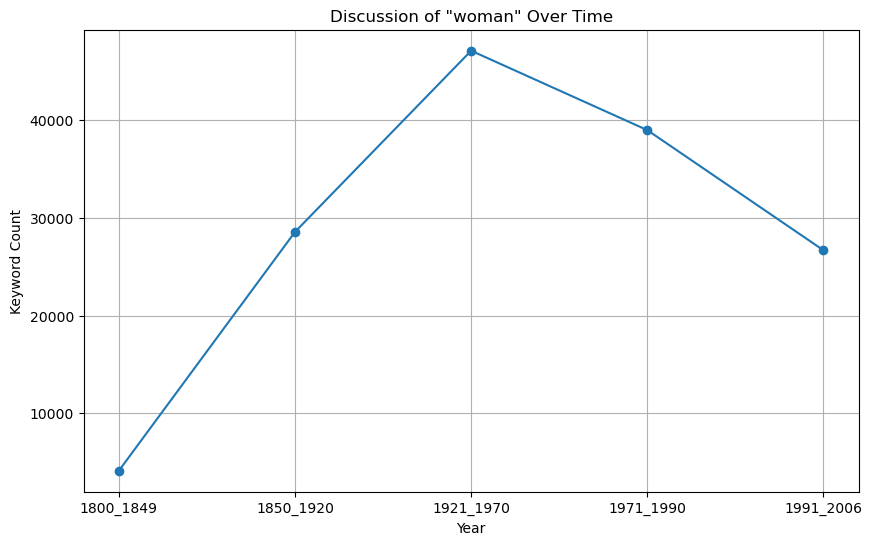

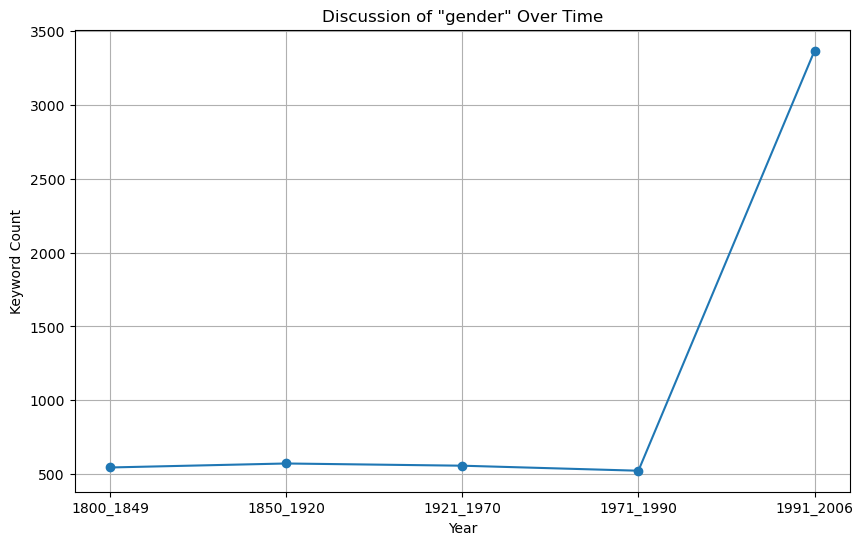

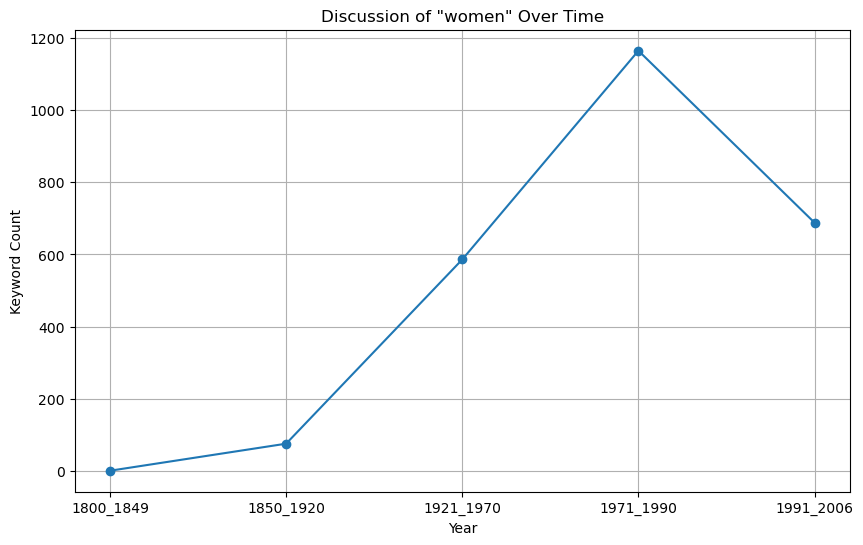

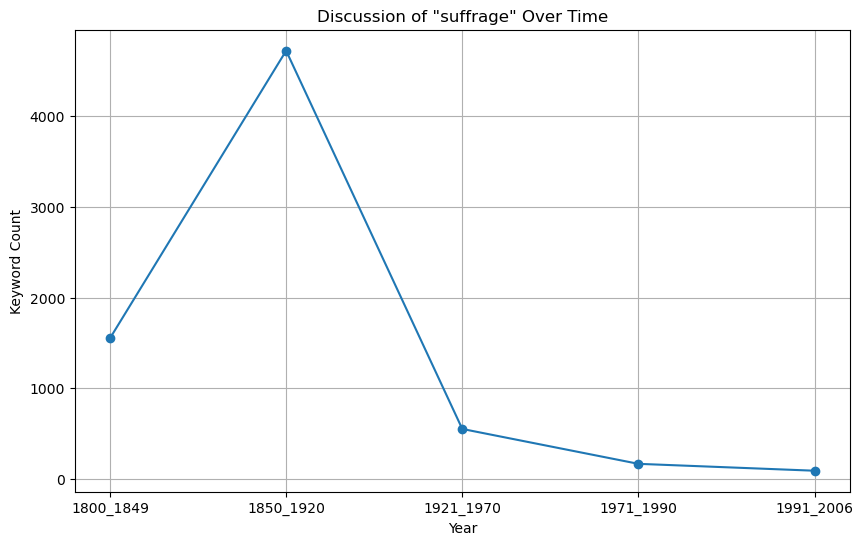

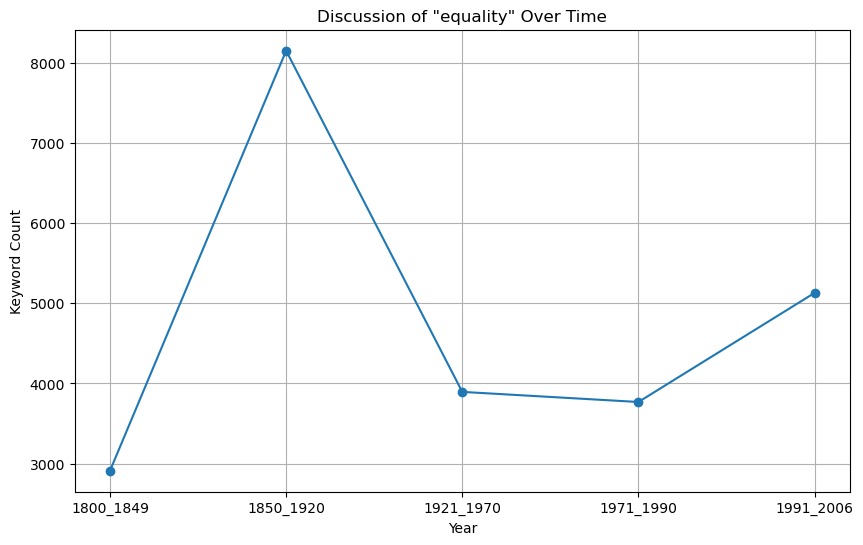

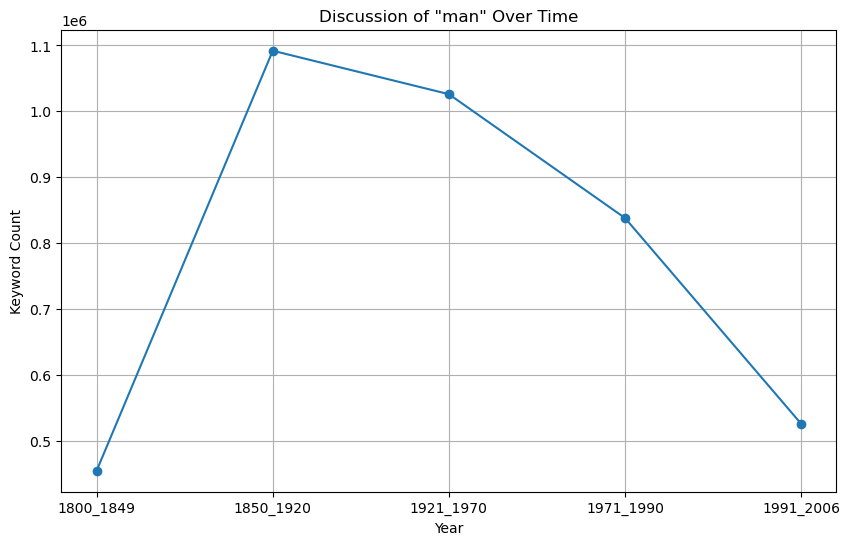

In [11]:
# Keywords related to women's topics
keywords = ['woman', 'gender', 'women', 'suffrage', 'equality', 'man']

# Initialize a dictionary to store keyword counts for each time period
keyword_counts_per_period = {keyword: {} for keyword in keywords}

# Function to count keywords in a list of sentences
def count_keywords(sentences, keyword):
    keyword_count = 0
    for sentence in sentences:
        keyword_count += sentence.count(keyword)
    return keyword_count

# Loop through the tokenized files
for file_name in os.listdir(input_directory_path):
    if file_name.endswith('_tokenized.txt'):
        with open(os.path.join(input_directory_path, file_name), 'r', encoding='utf-8') as file:
            sentences = [line.strip() for line in file.readlines()]
            time_period = file_name.replace('_tokenized.txt', '')

            for keyword in keywords:
                keyword_count = count_keywords(sentences, keyword)
                keyword_counts_per_period[keyword][time_period] = keyword_count

# Print keyword counts for each keyword and time period
for keyword, counts in keyword_counts_per_period.items():
    print(f'Keyword: {keyword}')
    for time_period, count in counts.items():
        print(f'Time Period: {time_period}, Count: {count}')
    print('\n')

# Create a separate line plot for each keyword
for keyword in keywords:
    counts_to_plot = keyword_counts_per_period[keyword]

    # Extract years and counts for the chosen keyword and sort them
    years = sorted(list(counts_to_plot.keys()))
    counts = [counts_to_plot[year] for year in years]

    # Create a line plot
    plt.figure(figsize=(10, 6))
    plt.plot(years, counts, marker='o', linestyle='-')
    plt.title(f'Discussion of "{keyword}" Over Time')
    plt.xlabel('Year')
    plt.ylabel('Keyword Count')
    plt.grid(True)

    # Show the plot
    plt.show()

Keyword: childbirth
Time Period: 1800_1849, Count: 30
Time Period: 1850_1920, Count: 34
Time Period: 1921_1970, Count: 288
Time Period: 1971_1990, Count: 318
Time Period: 1991_2006, Count: 254


Keyword: homemaker
Time Period: 1800_1849, Count: 0
Time Period: 1850_1920, Count: 0
Time Period: 1921_1970, Count: 0
Time Period: 1971_1990, Count: 12
Time Period: 1991_2006, Count: 0


Keyword: wife
Time Period: 1800_1849, Count: 3099
Time Period: 1850_1920, Count: 12923
Time Period: 1921_1970, Count: 21460
Time Period: 1971_1990, Count: 15769
Time Period: 1991_2006, Count: 4966




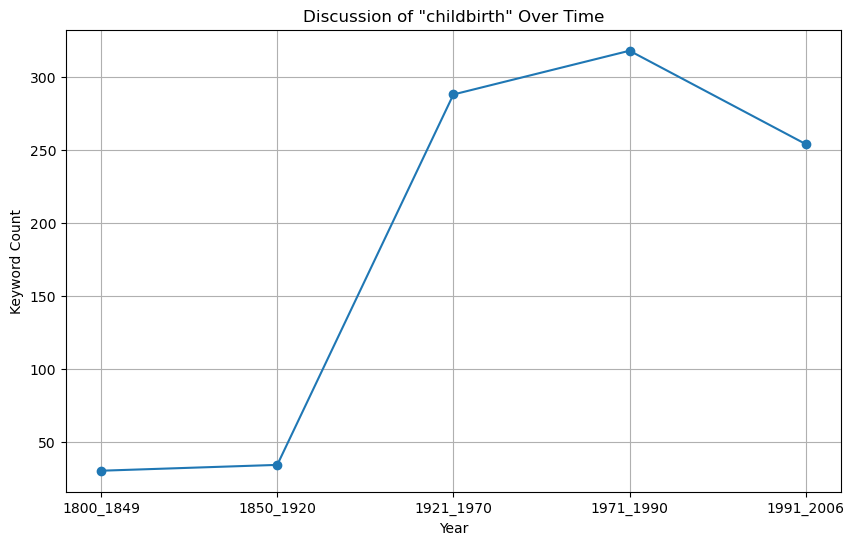

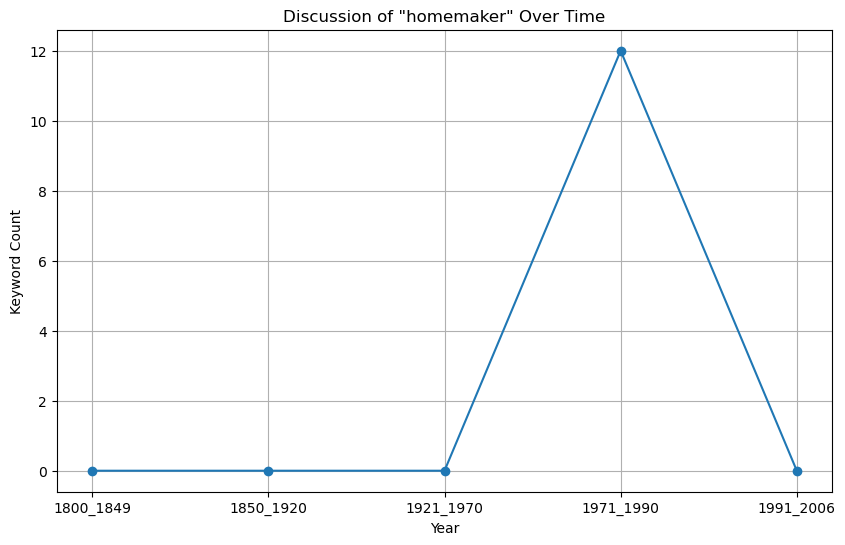

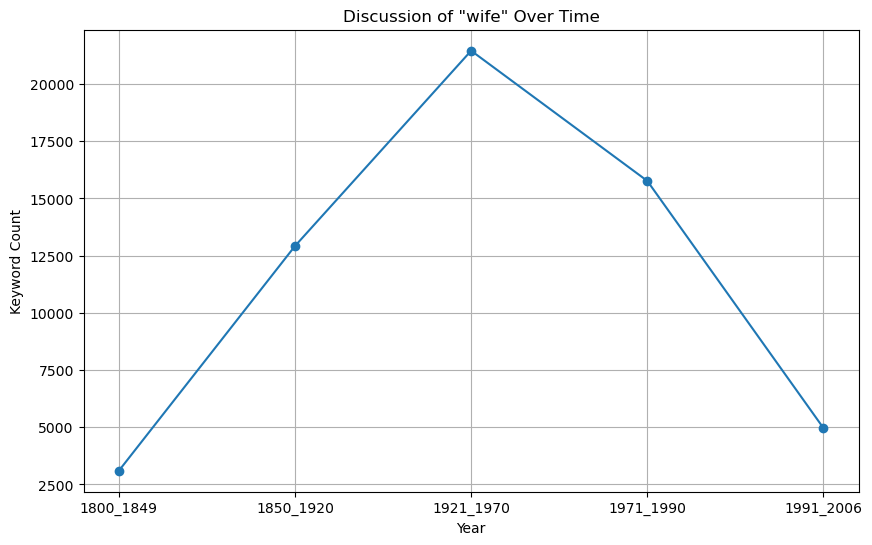

In [12]:
# Keywords related to women's topics
keywords = ['childbirth', 'homemaker', 'wife']

# Initialize a dictionary to store keyword counts for each time period
keyword_counts_per_period = {keyword: {} for keyword in keywords}

# Function to count keywords in a list of sentences
def count_keywords(sentences, keyword):
    keyword_count = 0
    for sentence in sentences:
        keyword_count += sentence.count(keyword)
    return keyword_count

# Loop through the tokenized files
for file_name in os.listdir(input_directory_path):
    if file_name.endswith('_tokenized.txt'):
        with open(os.path.join(input_directory_path, file_name), 'r', encoding='utf-8') as file:
            sentences = [line.strip() for line in file.readlines()]
            time_period = file_name.replace('_tokenized.txt', '')

            for keyword in keywords:
                keyword_count = count_keywords(sentences, keyword)
                keyword_counts_per_period[keyword][time_period] = keyword_count

# Print keyword counts for each keyword and time period
for keyword, counts in keyword_counts_per_period.items():
    print(f'Keyword: {keyword}')
    for time_period, count in counts.items():
        print(f'Time Period: {time_period}, Count: {count}')
    print('\n')

# Create a separate line plot for each keyword
for keyword in keywords:
    counts_to_plot = keyword_counts_per_period[keyword]

    # Extract years and counts for the chosen keyword and sort them
    years = sorted(list(counts_to_plot.keys()))
    counts = [counts_to_plot[year] for year in years]

    # Create a line plot
    plt.figure(figsize=(10, 6))
    plt.plot(years, counts, marker='o', linestyle='-')
    plt.title(f'Discussion of "{keyword}" Over Time')
    plt.xlabel('Year')
    plt.ylabel('Keyword Count')
    plt.grid(True)

    # Show the plot
    plt.show()

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis on a list of sentences
def perform_sentiment_analysis(sentences):
    sentiment_scores = []
    for sentence in sentences:
        sentiment_score = analyzer.polarity_scores(' '.join(sentence))
        sentiment_scores.append(sentiment_score)
    return sentiment_scores

# Loop through the tokenized files
for file_name in tqdm(os.listdir(input_directory_path)):
    if file_name.endswith('_tokenized.txt'):
        with open(os.path.join(input_directory_path, file_name), 'r', encoding='utf-8') as file:
            sentences = [line.strip().split() for line in file.readlines()]
            time_period = file_name.replace('_tokenized.txt', '')

            # Perform sentiment analysis on the sentences
            sentiment_scores = perform_sentiment_analysis(sentences)

            #Calculate and print the average sentiment score for this time period
            avg_sentiment_score = sum(sentiment['compound'] for sentiment in sentiment_scores) / len(sentiment_scores)
            print(f'Time Period: {time_period}, Average Sentiment Score: {avg_sentiment_score:.2f}')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shaistasyeda/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
 17%|█▋        | 1/6 [03:26<17:14, 206.96s/it]

Time Period: 1800_1849, Average Sentiment Score: 0.23


 50%|█████     | 3/6 [16:07<16:45, 335.18s/it]

Time Period: 1850_1920, Average Sentiment Score: 0.28


 67%|██████▋   | 4/6 [30:38<17:21, 520.65s/it]

Time Period: 1921_1970, Average Sentiment Score: 0.35


 83%|████████▎ | 5/6 [47:13<11:17, 677.49s/it]

Time Period: 1971_1990, Average Sentiment Score: 0.36


100%|██████████| 6/6 [53:17<00:00, 532.92s/it]

Time Period: 1991_2006, Average Sentiment Score: 0.39
